In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np

In [2]:
import pkg_resources
pkg_resources.require("seaborn==0.11.0")
import seaborn as sns

In [3]:
path="C:\\Users\\craig\\Documents\\Python Scripts\\Notebooks\\Loan_Data_Classification\\Data"
os.chdir(path) 


In [4]:
n = 10  # every 10th line = 10% of the lines
df = pd.read_csv('Lending_Tree_Cleaned.csv', header=0, index_col=0,skiprows=lambda i: i % n != 0)
#df = pd.read_csv('appl_accepted_20072019Q3.csv')

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [6]:
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,disbursement_method,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,loan_amnt,loan_status,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_mths_since_last_major_derog,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,verification_status_joint,zip_code,good_bad
9,0.0,13.0,GA,38.0,80000.0,5693.51,Individual,17600.0,4193.0,66.5,0.0,0.0,0.0,0.0,Cash,7.59,0.0,2006-10-01,4.0,664.0,660.0,10000.0,C,MORTGAGE,0.0,w,2.0,4.0,1.0,225.54,12.61,10000.0,Current,1785.0,133.0,137.0,4.0,4.0,2.0,27.0,27.0,127.0,18.0,4.0,27.0,4.0,27.0,2.0,10.0,14.0,10.0,11.0,3.0,16.0,18.0,14.0,17.0,0.0,0.0,0.0,6.0,17.0,1.0,0.0,0.0,1.0,6.0,12.0,91.3,40.0,0.0,0.0,home_improvement,10710.0,0.0,37.7,0.0,0.0,1934-03-01,544.0,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,C1,0.0,60 months,Home improvement,0.0,299196.0,388400.0,23.0,10710.0,0.0,12500.0,0.0,0.0,28400.0,Source Verified,none,306xx,1
19,0.0,1.0,NY,36.0,45000.0,5693.51,Individual,1728.0,11061.0,55.9,0.0,0.0,0.0,0.0,Cash,24.99,0.0,2002-09-01,4.0,724.0,720.0,14000.0,C,RENT,22.0,w,2.0,2.0,1.0,322.72,13.58,14000.0,Current,8836.0,160.0,186.0,27.0,17.0,0.0,226.0,226.0,127.0,17.0,36.0,202.0,1.0,202.0,0.0,2.0,3.0,3.0,4.0,12.0,6.0,10.0,3.0,12.0,0.0,0.0,0.0,0.0,12.0,0.0,6.0,0.0,1.0,0.0,0.0,100.0,66.7,0.0,0.0,debt_consolidation,14513.0,0.0,44.5,0.0,0.0,1934-03-01,544.0,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,C2,0.0,60 months,Debt consolidation,0.0,19006.0,52745.0,22.0,19006.0,4493.0,25100.0,0.0,20145.0,32600.0,Not Verified,none,110xx,1
29,0.0,12.0,MN,61.0,68000.0,5693.51,Individual,1028.0,3398.0,71.7,0.0,0.0,0.0,0.0,Cash,10.29,0.0,1991-06-01,5.0,664.0,660.0,18000.0,D,RENT,65.0,w,1.0,0.0,0.0,461.50,18.45,18000.0,Current,2851.0,74.0,321.0,13.0,13.0,0.0,226.0,226.0,51.0,22.0,13.0,202.0,13.0,202.0,0.0,7.0,9.0,9.0,10.0,3.0,12.0,13.0,9.0,13.0,0.0,0.0,0.0,0.0,13.0,0.0,1.0,0.0,1.0,0.0,11.0,100.0,33.3,7.0,0.0,credit_card,8736.0,0.0,58.6,0.0,0.0,1934-03-01,544.0,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,D2,7.0,60 months,Credit card refinancing,0.0,13364.0,22048.0,16.0,13364.0,4628.0,12000.0,0.0,7148.0,14900.0,Source Verified,none,550xx,1
39,0.0,6.0,NC,41.0,103000.0,5693.51,Individual,6373.0,59034.0,26.5,0.0,0.0,0.0,0.0,Cash,30.76,0.0,2002-03-01,6.0,724.0,720.0,28000.0,B,MORTGAGE,91.0,w,0.0,0.0,0.0,915.36,10.90,28000.0,Current,10750.0,134.0,184.0,2.0,2.0,1.0,73.0,73.0,127.0,4.0,2.0,202.0,25.0,202.0,1.0,4.0,4.0,9.0,15.0,12.0,9.0,17.0,4.0,12.0,0.0,0.0,0.0,3.0,12.0,3.0,3.0,2.0,3.0,1.0,3.0,96.7,11.1,0.0,0.0,debt_consolidation,21266.0,0.0,26.5,0.0,0.0,1934-03-01,544.0,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,B4,0.0,36 months,Debt consolidation,0.0,76475.0,153679.0,30.0,76475.0,

In [7]:
#loan and funded is always the same - funded can be removed
df[df['loan_amnt']!=df['funded_amnt']]

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,disbursement_method,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,loan_amnt,loan_status,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_mths_since_last_major_derog,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,verification_status_joint,zip_code,good_bad
263269,0.0,2.0,KS,95.0,50000.0,5693.51,Individual,9046.0,3217.0,94.0,0.0,0.0,0.0,0.0,Cash,28.13,0.0,2000-08-01,11.0,684.0,680.0,10000.0,B,MORTGAGE,83.0,w,0.0,0.0,0.0,219.78,11.47,20000.0,Current,3726.0,188.0,127.0,11.0,11.0,0.0,226.0,226.0,127.0,14.0,11.0,202.0,14.0,202.0,0.0,3.0,4.0,3.0,3.0,8.0,4.0,7.0,4.0,6.0,0.0,0.0,0.0,1.0,6.0,0.0,2.0,0.0,1.0,1.0,1.0,100.0,100.0,0.0,0.0,debt_consolidation,15590.0,0.0,95.0,0.0,0.0,1934-03-01,544.0,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,B5,0.0,60 months,Debt consolidation,0.0,54279.0,62990.0,15.0,54279.0,38689.0,9650.0,0.0,46640.0,16350.0,Verified,none,667xx,1


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
acc_now_delinq,137322.0,0.003779,0.066924,0.00,0.00,0.00,0.0000,6.000000e+00
acc_open_past_24mths,137322.0,4.574853,3.246146,0.00,2.00,4.00,6.0000,4.600000e+01
all_util,137322.0,57.037554,20.877342,0.00,43.00,58.00,72.0000,1.810000e+02
annual_inc,137322.0,80696.802347,308724.730594,0.00,47000.00,66000.00,95000.0000,1.100000e+08
annual_inc_joint,137322.0,16066.051035,38635.914014,5693.51,5693.51,5693.51,5693.5100,1.300000e+06
avg_cur_bal,137322.0,13647.348910,16792.692432,0.00,3031.00,7265.50,18921.0000,6.463390e+05
bc_open_to_buy,137322.0,21245.348742,78317.702759,0.00,2241.00,6694.00,16848.5000,7.111400e+05
bc_util,137322.0,53.626240,29.345949,0.00,29.90,54.50,79.3000,1.930000e+02
chargeoff_within_12_mths,137322.0,0.008083,0.101583,0.00,0.00,0.00,0.0000,7.000000e+00
collections_12_mths_ex_med,137322.0,0.021177,0.166971,0.00,0.00,0.00,0.0000,1.200000e+01


In [9]:
#Only two types of loan terms.
df['term'].value_counts()

 36 months    98529
 60 months    38793
Name: term, dtype: int64

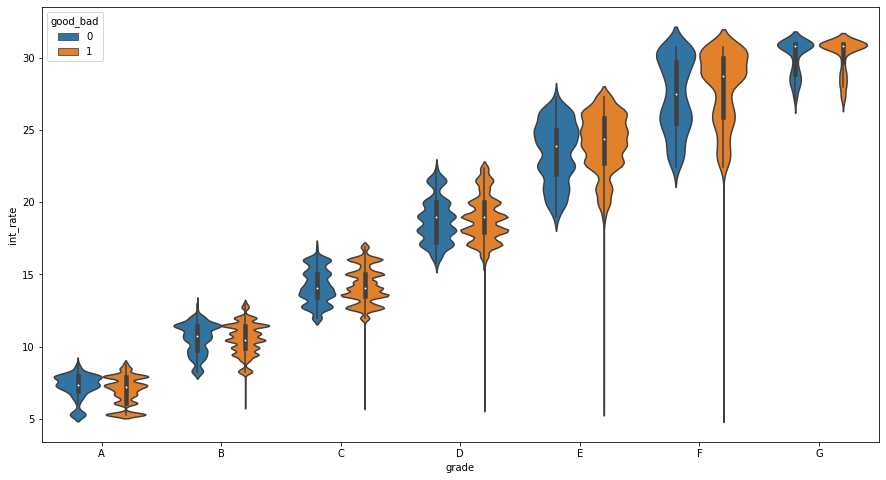

In [10]:
plt.figure(figsize=(15,8))
pricebox = sns.violinplot(x="grade", y="int_rate", data=df, hue='good_bad', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
#pricebox.set_xticklabels(pricebox.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

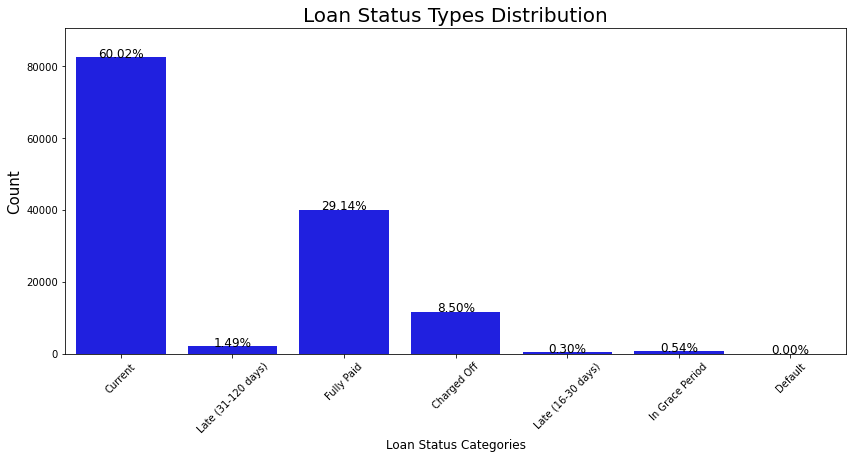

In [11]:
total = len(df)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=df, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

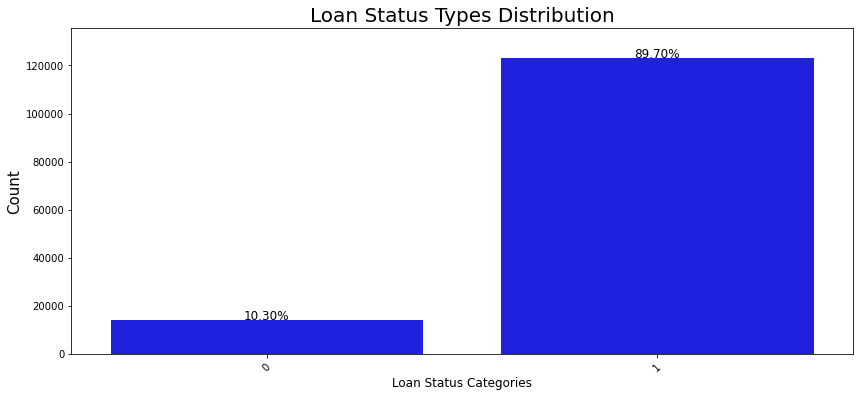

In [12]:
total = len(df)

plt.figure(figsize = (14,6))

g = sns.countplot(x="good_bad", data=df, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

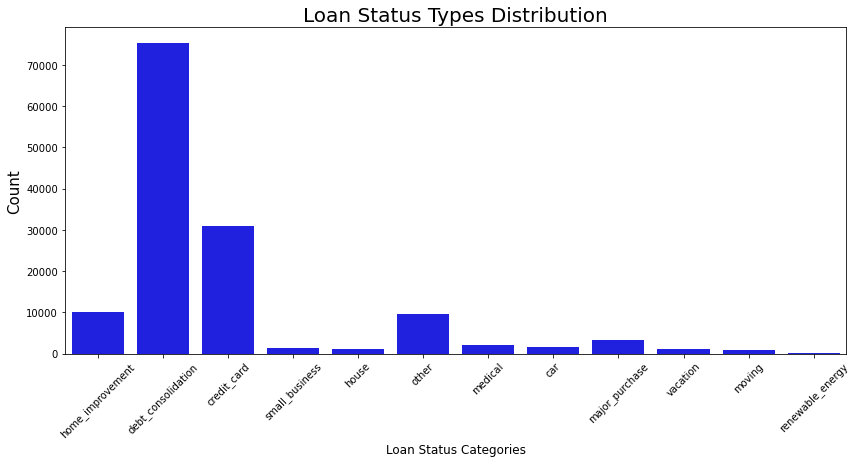

In [13]:
total = len(df)

plt.figure(figsize = (14,6))

g = sns.countplot(x="purpose", data=df, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
#g.set_xticks([float(n)-0.5 for n in g.get_xticks()])
#sizes=[]
#for p in g.patches:
#    height = p.get_height()
#    sizes.append(height)
#    g.text(p.get_x()+p.get_width()/2.,
#            height + 3,
#            '{:1.2f}%'.format(height/total*100),
#            ha="center", fontsize=12) 
#g.set_ylim(0, max(sizes) * 1.10)

plt.show()

[Text(0, 0, 'home_improvement'),
 Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'house'),
 Text(0, 0, 'other'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'car'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'renewable_energy')]

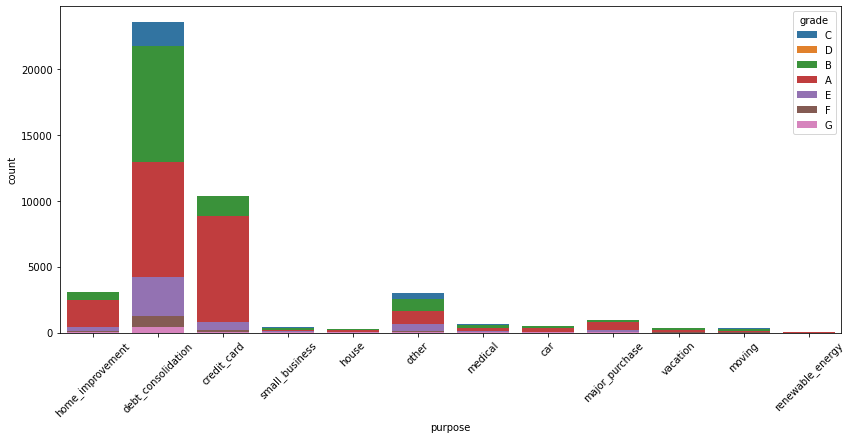

In [14]:
#ax = sns.countplot(x="purpose", hue="grade", data=df, dodge=False)
plt.figure(figsize = (14,6))
ax = sns.countplot(x="purpose", data=df, hue='grade', dodge=False)
ax.set_xticklabels(g.get_xticklabels(),rotation=45)


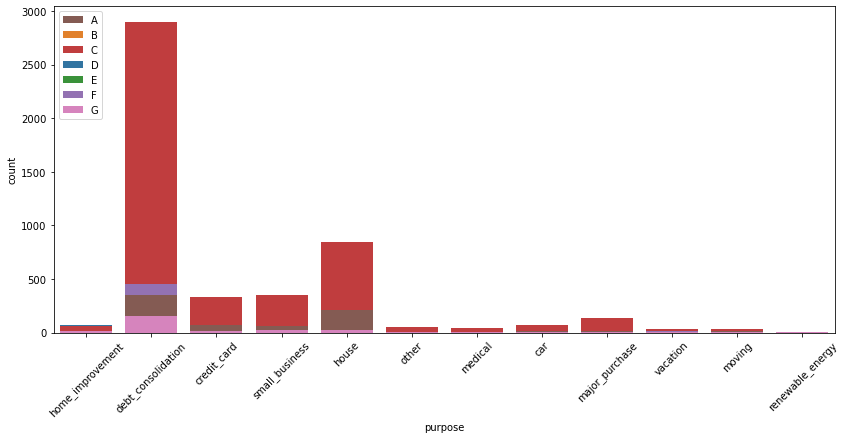

In [15]:


plt.figure(figsize = (14,6))
ax = sns.countplot(x="purpose", data=df[df["good_bad"]==0], hue='grade', dodge=False)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[5], handles[1], handles[3], handles[0], handles[2], handles[4],handles[6]]
labels = [labels[5], labels[1], labels[3], labels[0], labels[2], labels[4],labels[6] ]
ax.legend(handles,labels,loc=2)

ax.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()


In [16]:
#Exploring the loan_status x purpose
purp_loan= ['purpose', 'good_bad']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(df[purp_loan[0]], df[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

good_bad,0,1
purpose,,
car,0.910000,1.100000
credit_card,17.740000,23.070000
debt_consolidation,58.330000,54.430000
home_improvement,6.780000,7.310000
house,0.780000,0.750000
major_purchase,2.640000,2.430000
medical,1.590000,1.430000
moving,0.990000,0.680000
other,7.670000,6.990000


In [17]:
loan_grade = ['good_bad', 'grade']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df[loan_grade[0]], df[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
good_bad,,,,,,,
0,777,2891,4847,3125,1581,677,243
1,27378,38093,35652,15350,5030,1259,419


In [18]:
loan_grade = ['good_bad', 'grade']
cm = sns.light_palette("blue", as_cmap=True)
round(pd.crosstab(df[loan_grade[0]], df[loan_grade[1]], 
            values=df['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
good_bad,,,,,,,
0,7.260000,10.570000,14.190000,18.730000,23.460000,27.350000,29.990000
1,7.000000,10.580000,14.260000,18.900000,24.080000,27.950000,30.180000


In [19]:
loan_grade = ['good_bad', 'sub_grade']
cm = sns.light_palette("blue", as_cmap=True)
round(pd.crosstab(df[loan_grade[0]], df[loan_grade[1]], 
            values=df['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
good_bad,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.330000,6.650000,7.130000,7.460000,8.030000,8.830000,9.750000,10.430000,11.020000,11.670000,12.560000,13.410000,13.950000,14.820000,15.810000,16.870000,17.870000,18.870000,19.760000,21.000000,21.590000,22.800000,23.460000,24.280000,25.360000,25.920000,27.010000,27.660000,28.230000,28.750000,29.590000,29.740000,29.890000,30.400000,30.510000
1,5.560000,6.600000,7.070000,7.580000,8.150000,9.170000,9.970000,10.580000,11.130000,11.900000,12.740000,13.640000,14.180000,15.090000,16.050000,17.150000,18.190000,19.170000,20.100000,21.460000,22.300000,23.270000,24.110000,25.080000,26.060000,27.090000,27.320000,28.460000,28.930000,29.490000,29.980000,29.780000,30.200000,30.580000,30.640000


In [20]:
cm = sns.light_palette("green", as_cmap=True)

round((pd.crosstab(df['good_bad'], df['purpose'],
            values=df['dti'], aggfunc='mean')).fillna(0),
      2).style.background_gradient(cmap = cm)

purpose,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
good_bad,,,,,,,,,,,,
0,19.490000,20.910000,21.400000,18.470000,15.310000,16.560000,19.150000,18.680000,18.590000,17.750000,17.560000,19.050000
1,16.090000,19.160000,19.790000,17.780000,16.210000,16.410000,18.090000,18.680000,17.440000,18.940000,15.530000,19.560000


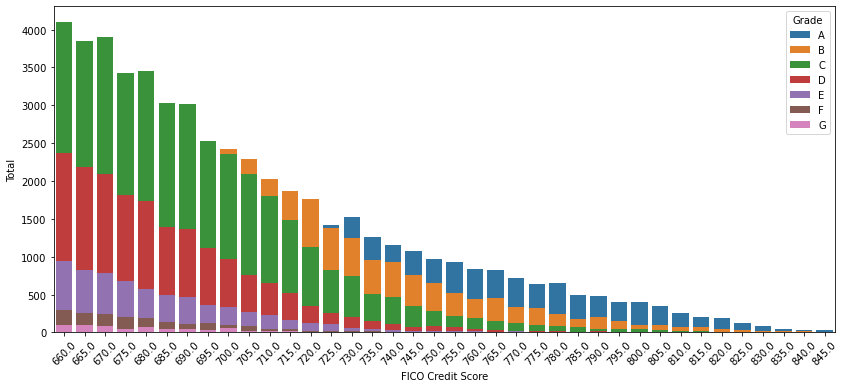

In [21]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x="fico_range_low", data=df, hue='grade',  hue_order =['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,dodge=False)
ax.legend(title="Grade", loc=1)
ax.set(xlabel='FICO Credit Score', ylabel='Total')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

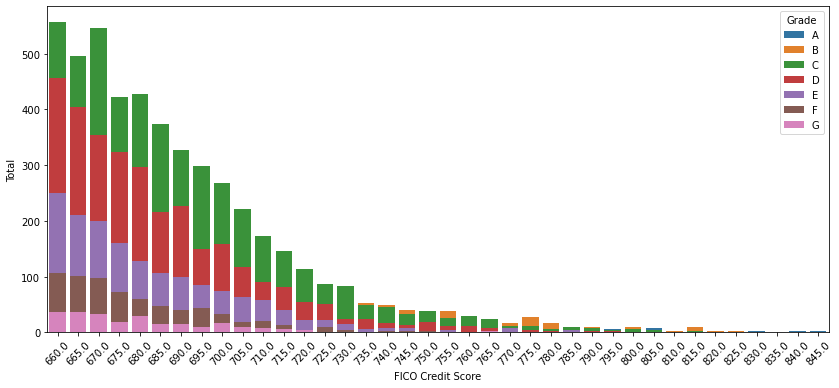

In [22]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x="fico_range_low", data=df[df['good_bad']==0], hue='grade',  hue_order =['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,dodge=False)
ax.legend(title="Grade", loc=1)
ax.set(xlabel='FICO Credit Score', ylabel='Total')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

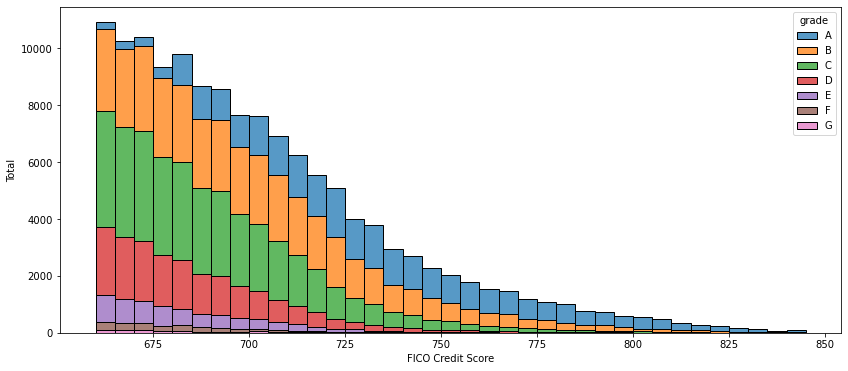

In [23]:
plt.figure(figsize = (14,6))
ax = sns.histplot(x="fico_range_low", data=df, hue='grade',  hue_order =['A', 'B', 'C', 'D', 'E', 'F', 'G'] 
                  , stat = 'count'
                 ,  multiple='stack', binwidth=5)
#ax.legend(title="Grade", loc=1)
ax.set(xlabel='FICO Credit Score', ylabel='Total')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

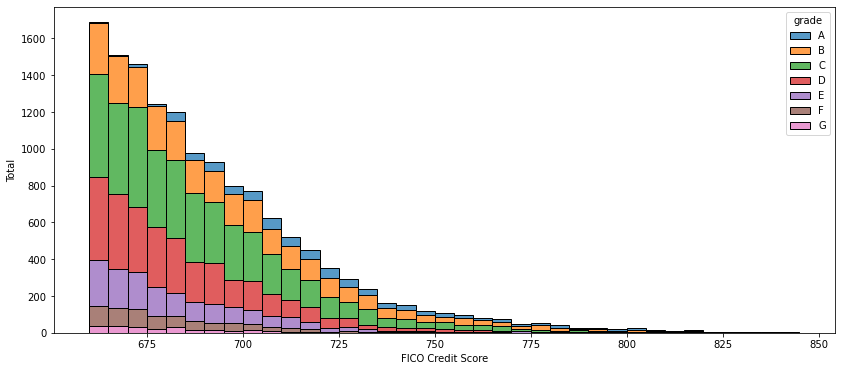

In [24]:
plt.figure(figsize = (14,6))
ax = sns.histplot(x="fico_range_low", data=df[df['good_bad']==0], hue='grade',  hue_order =['A', 'B', 'C', 'D', 'E', 'F', 'G'] 
                  , stat = 'count'
                 ,  multiple='stack', binwidth=5)
#ax.legend(title="Grade", loc=1)
ax.set(xlabel='FICO Credit Score', ylabel='Total')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

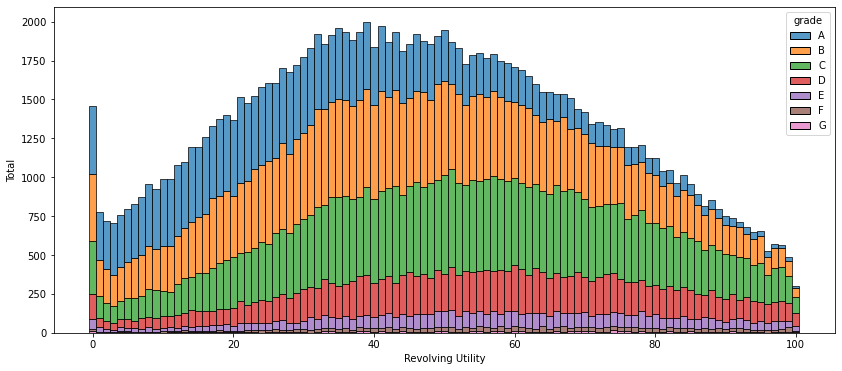

In [25]:
plt.figure(figsize = (14,6))
ax = sns.histplot(x="revol_util", data=df, hue='grade',  hue_order =['A', 'B', 'C', 'D', 'E', 'F', 'G'] 
                  , binrange = [0,100], stat = 'count'
                 , discrete=True, bins = 50, multiple='stack')
#ax.legend(title="Grade", loc=1)
ax.set(xlabel='Revolving Utility', ylabel='Total')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

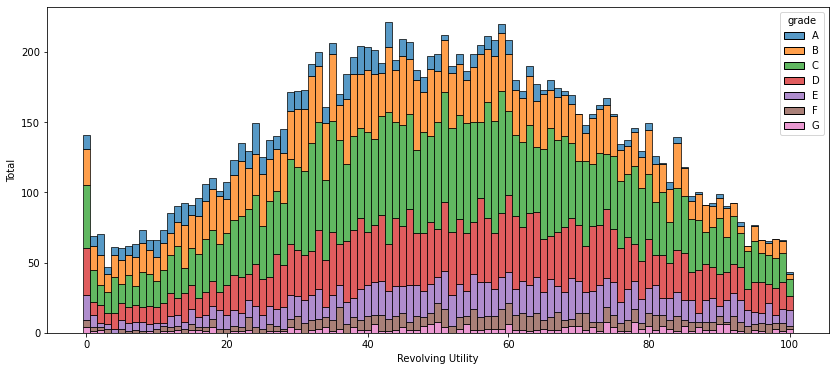

In [26]:
plt.figure(figsize = (14,6))
ax = sns.histplot(x="revol_util", data=df[df['good_bad']==0], hue='grade',  hue_order =['A', 'B', 'C', 'D', 'E', 'F', 'G'] 
                  , binrange = [0,100], stat = 'count'
                 , discrete=True, bins = 50, multiple='stack')
#ax.legend(title="Grade", loc=1)
ax.set(xlabel='Revolving Utility', ylabel='Total')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [27]:
import sidetable

#styling within jupyter notebook

In [28]:
df.stb.freq(['grade', 'good_bad']).stb.subtotal().sort_values(['grade', 'good_bad'])

,grade,good_bad,count,percent,cumulative_count,cumulative_percent
10,A,0.0,777.0,0.565823,135983.0,99.024920
2,A,1.0,27378.0,19.937082,101123.0,73.639329
7,B,0.0,2891.0,2.105271,132366.0,96.390964
0,B,1.0,38093.0,27.739911,38093.0,27.739911
5,C,0.0,4847.0,3.529660,126350.0,92.010020
1,C,1.0,35652.0,25.962337,73745.0,53.702247
6,D,0.0,3125.0,2.275673,129475.0,94.285693
3,D,1.0,15350.0,11.178107,116473.0,84.817436
8,E,0.0,1581.0,1.151309,133947.0,97.542273
4,E,1.0,5030.0,3.662924,121503.0,88.480360


In [29]:
#groupby(["Sex", "Pclass"])["Fare"].mean()
df.groupby(['grade','good_bad'])['good_bad'].count()

grade  good_bad
A      0             777
       1           27378
B      0            2891
       1           38093
C      0            4847
       1           35652
D      0            3125
       1           15350
E      0            1581
       1            5030
F      0             677
       1            1259
G      0             243
       1             419
Name: good_bad, dtype: int64

C:\Users\craig\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


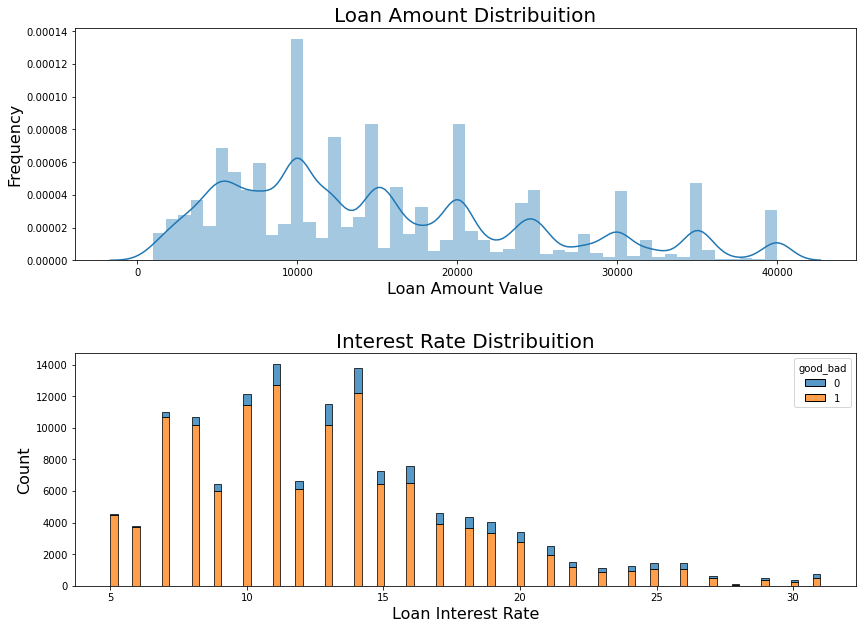

In [30]:
df['int_round'] = df['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.histplot(x="int_round", data=df, hue='good_bad', multiple='stack' )
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
#sizes=[] # Get highest values in y
#for p in g1.patches:
#    height = p.get_height()
#    sizes.append(height)
#    g1.text(p.get_x()+p.get_width()/2.,
#            height + 3,
#            '{:1.2f}%'.format(height/total*100),
#            ha="center", fontsize=12) 
#g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

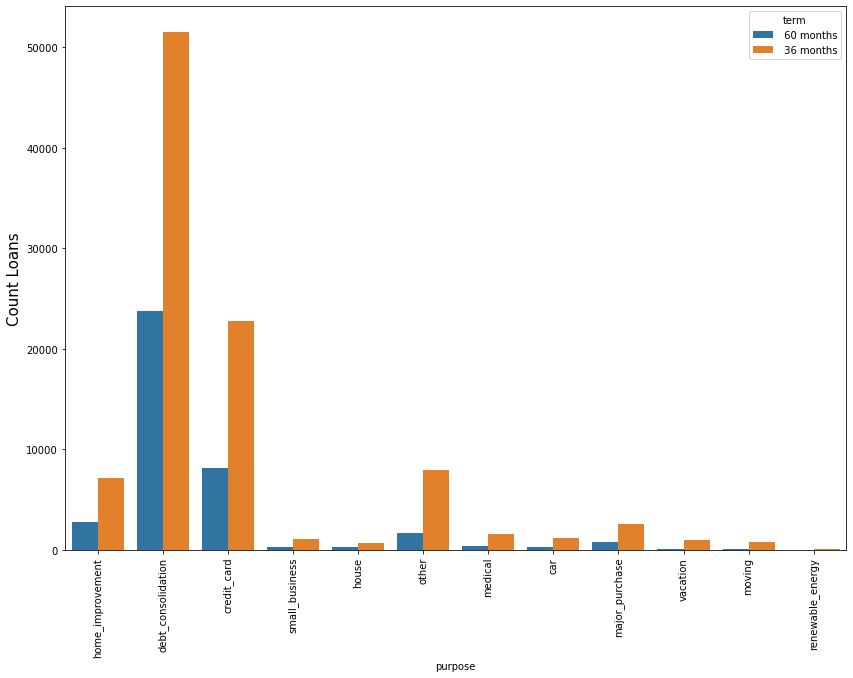

In [31]:
plt.figure(figsize=(14,10))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g1 = sns.countplot(x='purpose', hue='term', 
                   data=df)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
#g1.set_xlabel("Years", fontsize=15)
g1.set_ylabel("Count Loans", fontsize=15)
plt.show()



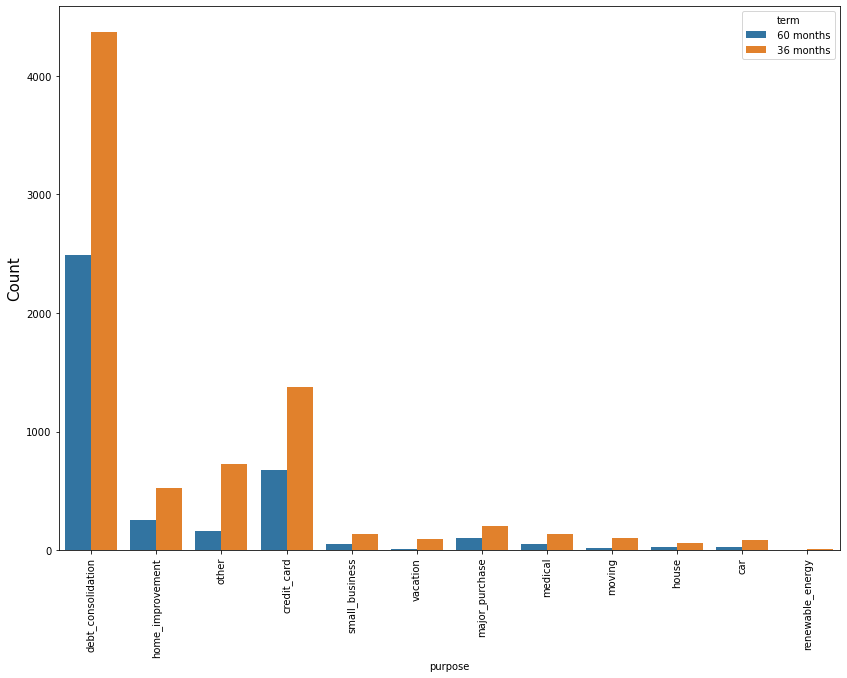

In [32]:
plt.figure(figsize=(14,10))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g2 = sns.countplot(x='purpose', data=df.loc[(df['loan_status'] == 'Charged Off') | 
                                                   (df['loan_status'] == 'NMCP Charged Off') |
                                                   (df['loan_status'] == 'Default')],
                  hue='term',)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
#g2.set_xlabel("Dates", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
#g2.set_title("Analysing Charge Off and Default by Years", fontsize=20)

#plt.subplots_adjust(hspace = 0.3,top = 0.9)

plt.show()